In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [46]:
# Load the e-commerce fraud dataset
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")

# Show first 5 rows
fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
# Number of rows and columns
fraud_df.shape


(151112, 11)

In [49]:
# Dataset info: data types & missing values
fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
# Count missing values per column
fraud_df.isnull().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [7]:
# Number of duplicate rows
fraud_df.duplicated().sum()


np.int64(0)

In [8]:
# Remove duplicates if any
fraud_df = fraud_df.drop_duplicates()


In [9]:
# Convert time columns to datetime format
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Verify conversion
fraud_df.dtypes


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

In [10]:
# Count of fraud vs non-fraud
fraud_df['class'].value_counts()


class
0    136961
1     14151
Name: count, dtype: int64

In [11]:
# Percentage distribution
fraud_df['class'].value_counts(normalize=True) * 100


class
0    90.635423
1     9.364577
Name: proportion, dtype: float64

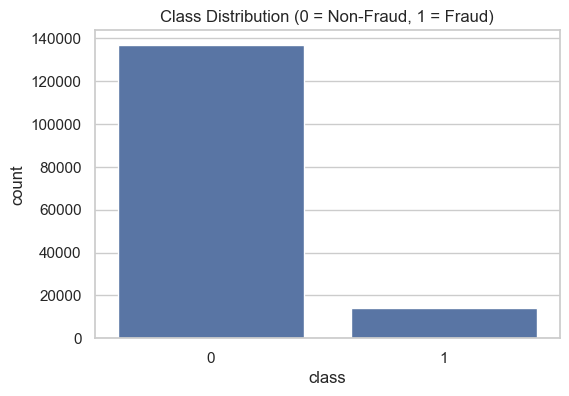

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=fraud_df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()


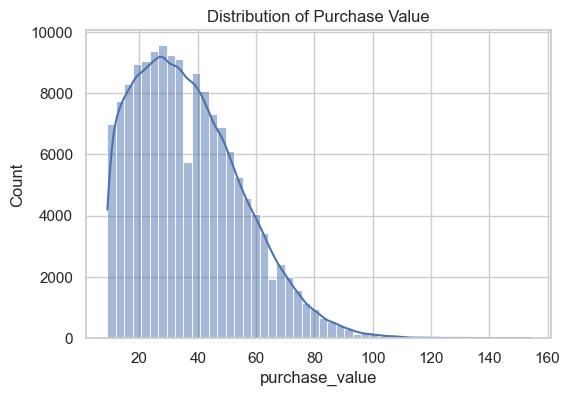

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title("Distribution of Purchase Value")
plt.show()


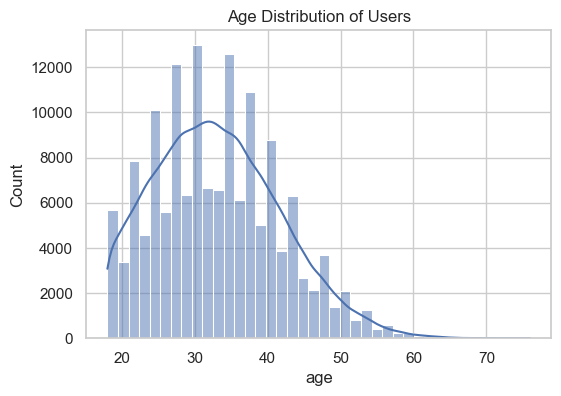

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(fraud_df['age'], bins=40, kde=True)
plt.title("Age Distribution of Users")
plt.show()


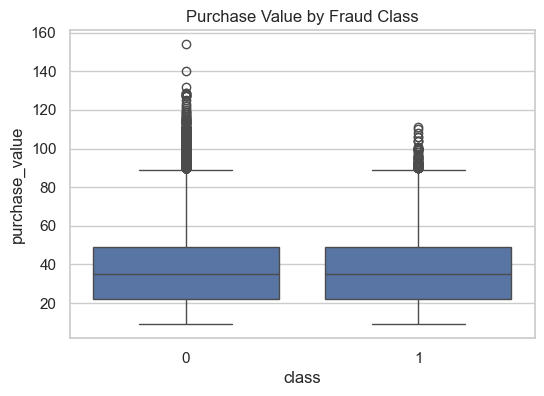

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title("Purchase Value by Fraud Class")
plt.show()


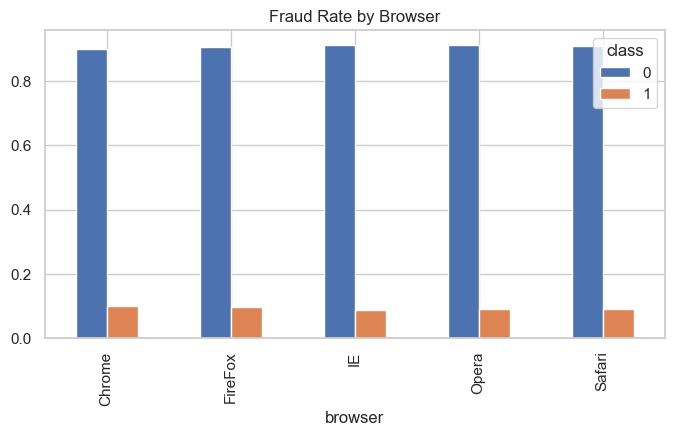

In [42]:
pd.crosstab(fraud_df['browser'], fraud_df['class'], normalize='index').plot(
    kind='bar', figsize=(8,4)
)
plt.title("Fraud Rate by Browser")
plt.show()


In [5]:
# Load IP address to country mapping dataset
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")

# Display first rows
ip_df.head()


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
